<a href="https://colab.research.google.com/github/alyssamw/cs35l/blob/master/Copy_of_CS146_Winter2021_PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [12]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.layer = torch.nn.Linear(784, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        loss = torch.nn.CrossEntropyLoss()
        input = x
        outputs = self.layer(x)
        #outputs = loss(input,target)

        ### ========== TODO : END ========== ###
        return outputs

In [14]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.layer1 = torch.nn.Linear(784, 400)
        self.in2 = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(400, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        input = x
        out1 = self.layer1(x)
        in2 = self.in2(out1)
        outputs = self.layer2(in2)
        ### ========== TODO : END ========== ###
        return outputs

In [15]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [16]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [17]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [18]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [19]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            y_pred = model.forward(batch_X)
            loss = criterion(y_pred, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075398 | train acc 0.453333 | valid loss 1.084938 | valid acc 0.453333 |
| epoch  2 | train loss 1.021364 | train acc 0.566667 | valid loss 1.031102 | valid acc 0.553333 |
| epoch  3 | train loss 0.972648 | train acc 0.630000 | valid loss 0.982742 | valid acc 0.593333 |
| epoch  4 | train loss 0.928398 | train acc 0.710000 | valid loss 0.938953 | valid acc 0.640000 |
| epoch  5 | train loss 0.887963 | train acc 0.783333 | valid loss 0.899045 | valid acc 0.700000 |
| epoch  6 | train loss 0.850839 | train acc 0.826667 | valid loss 0.862485 | valid acc 0.753333 |
| epoch  7 | train loss 0.816627 | train acc 0.850000 | valid loss 0.828852 | valid acc 0.793333 |
| epoch  8 | train loss 0.785000 | train acc 0.886667 | valid loss 0.797807 | valid acc 0.846667 |
| epoch  9 | train loss 0.755688 | train acc 0.900000 | valid loss 0.769067 | valid acc 0.866667 |
| epoch 10 | train loss 0.728461 | train acc 0.903333 |

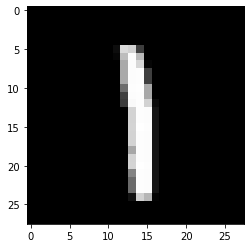

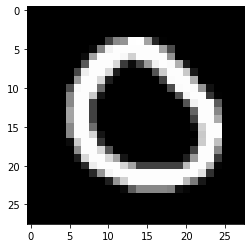

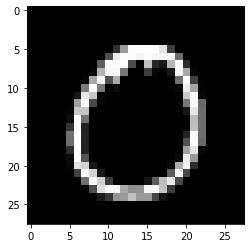

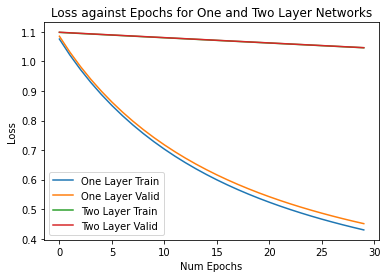

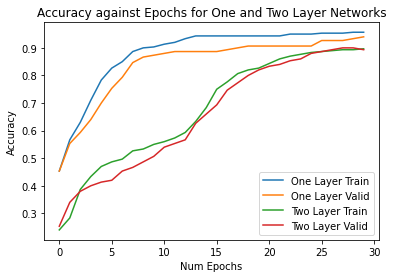

One Layer Test: 0.960000, Two Layer Test: 0.900000
Start training OneLayerNetwork with Adam...
| epoch  1 | train loss 0.197655 | train acc 0.970000 | valid loss 0.217931 | valid acc 0.953333 |
| epoch  2 | train loss 0.131471 | train acc 0.983333 | valid loss 0.160481 | valid acc 0.960000 |
| epoch  3 | train loss 0.102530 | train acc 0.986667 | valid loss 0.136721 | valid acc 0.973333 |
| epoch  4 | train loss 0.085124 | train acc 0.990000 | valid loss 0.123066 | valid acc 0.973333 |
| epoch  5 | train loss 0.073182 | train acc 0.990000 | valid loss 0.114030 | valid acc 0.973333 |
| epoch  6 | train loss 0.064365 | train acc 0.990000 | valid loss 0.107544 | valid acc 0.966667 |
| epoch  7 | train loss 0.057539 | train acc 0.993333 | valid loss 0.102632 | valid acc 0.966667 |
| epoch  8 | train loss 0.052074 | train acc 1.000000 | valid loss 0.098767 | valid acc 0.966667 |
| epoch  9 | train loss 0.047588 | train acc 1.000000 | valid loss 0.095640 | valid acc 0.966667 |
| epoch 10 | t

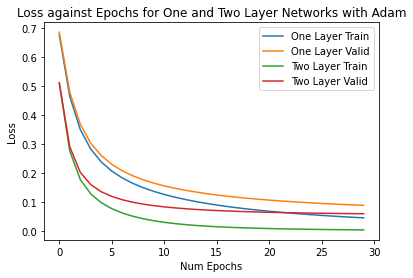

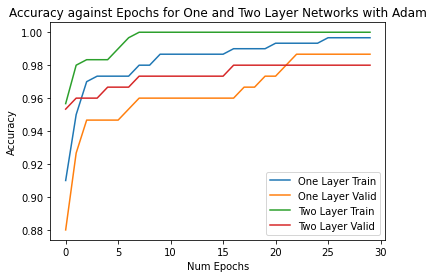

(Adam) One Layer Test: 0.966667, Two Layer Test: 0.966667


In [20]:
#@title
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/My Drive/cs146"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    
    for i in range(0,3):
      plot_img(X_train[i])
    
    ### ========== TODO : END ========== ###

    print("Data preparation...")

    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    X_train = torch.tensor(X_train)
    X_valid = torch.tensor(X_valid)
    X_test = torch.tensor(X_test)

    y_train = torch.tensor(y_train)
    y_valid = torch.tensor(y_valid)
    y_test = torch.tensor(y_test)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part c: prepare dataloaders for training, validation, and testing
    ###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    train_loader = DataLoader(TensorDataset(X_train, y_train), 10)
    valid_loader = DataLoader(TensorDataset(X_valid, y_valid), 10)
    test_loader = DataLoader(TensorDataset(X_test, y_test), 10)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part e: prepare OneLayerNetwork, criterion, and optimizer
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    ### part h: prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    plt.figure()
    plt.plot(range(0, len(one_train_loss)), one_train_loss, label="One Layer Train")
    plt.plot(range(0, len(one_valid_loss)), one_valid_loss, label="One Layer Valid")
    plt.plot(range(0, len(two_train_loss)), two_train_loss, label="Two Layer Train")
    plt.plot(range(0, len(two_valid_loss)), two_valid_loss, label="Two Layer Valid")
    plt.title("Loss against Epochs for One and Two Layer Networks")
    plt.xlabel("Num Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.figure()
    plt.plot(range(0, len(one_train_acc)), one_train_acc, label="One Layer Train")
    plt.plot(range(0, len(one_valid_acc)), one_valid_acc, label="One Layer Valid")
    plt.plot(range(0, len(two_train_acc)), two_train_acc, label="Two Layer Train")
    plt.plot(range(0, len(two_valid_acc)), two_valid_acc, label="Two Layer Valid")
    plt.title("Accuracy against Epochs for One and Two Layer Networks")
    plt.xlabel("Num Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy
    one_test_acc = evaluate_acc(model_one, test_loader)
    two_test_acc = evaluate_acc(model_two, test_loader)
    print(f"One Layer Test: {one_test_acc:.6f}, Two Layer Test: {two_test_acc:.6f}")
    ### ========== TODO : END ========== ###

    # part K improve:

    model_one = OneLayerNetwork()
    model_two = TwoLayerNetwork()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.05)
    print("Start training OneLayerNetwork with Adam...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.05)
    print("Start training TwoLayerNetwork with Adam...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_test_acc = evaluate_acc(model_one, test_loader)
    two_test_acc = evaluate_acc(model_two, test_loader)
    print(f"(Imp) One Layer Test: {one_test_acc:.6f}, Two Layer Test: {two_test_acc:.6f}")

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    model_one = OneLayerNetwork()
    model_two = TwoLayerNetwork()
    optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)
    print("Start training OneLayerNetwork with Adam...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)
    print("Start training TwoLayerNetwork with Adam...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    plt.figure()
    plt.plot(range(0, len(one_train_loss)), one_train_loss, label="One Layer Train")
    plt.plot(range(0, len(one_valid_loss)), one_valid_loss, label="One Layer Valid")
    plt.plot(range(0, len(two_train_loss)), two_train_loss, label="Two Layer Train")
    plt.plot(range(0, len(two_valid_loss)), two_valid_loss, label="Two Layer Valid")
    plt.title("Loss against Epochs for One and Two Layer Networks with Adam")
    plt.xlabel("Num Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.figure()
    plt.plot(range(0, len(one_train_acc)), one_train_acc, label="One Layer Train")
    plt.plot(range(0, len(one_valid_acc)), one_valid_acc, label="One Layer Valid")
    plt.plot(range(0, len(two_train_acc)), two_train_acc, label="Two Layer Train")
    plt.plot(range(0, len(two_valid_acc)), two_valid_acc, label="Two Layer Valid")
    plt.title("Accuracy against Epochs for One and Two Layer Networks with Adam")
    plt.xlabel("Num Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    ### part k: calculate the test accuracy
    one_test_acc = evaluate_acc(model_one, test_loader)
    two_test_acc = evaluate_acc(model_two, test_loader)
    print(f"(Adam) One Layer Test: {one_test_acc:.6f}, Two Layer Test: {two_test_acc:.6f}")

    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()